In [4]:
# Dependencies
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [7]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results_june = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month',Measurement.date)==6)
#print(results_june)

In [8]:
#  3. Convert the June temperatures to a list.
results_june = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month',Measurement.date)==6).all()
print(results_june)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [9]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
results_june_df = pd.DataFrame(results_june, columns = ['date', 'June Temps'])

results_june_df

,date,June Temps
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [10]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
results_june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [11]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results_dec = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month',Measurement.date)==12)

In [12]:
# 7. Convert the December temperatures to a list.
results_dec = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month',Measurement.date)==12).all()
print(results_dec)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [13]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
results_dec_df = pd.DataFrame(results_dec, columns = ['date', 'December Temps'])

results_dec_df

,date,December Temps
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [14]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
results_dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


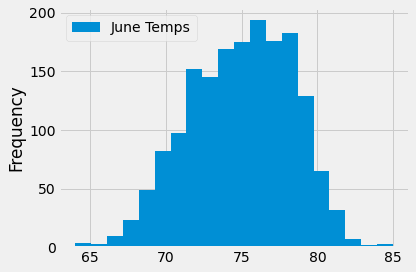

In [15]:
# Plot results from June to visualize
results_june_df.plot.hist(bins=20)
plt.tight_layout()

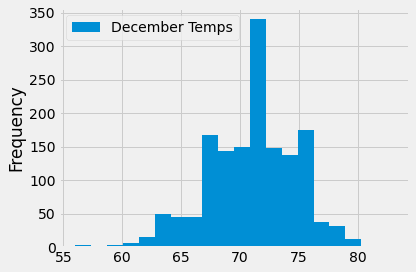

In [16]:
# Plot results from December to visualize
results_dec_df.plot.hist(bins=20)
plt.tight_layout()

In [17]:
# Merge and Compare June and Decembers temperture dataframes

compared_june = results_june_df.describe()
compared_dec = results_dec_df.describe()

compared_df = compared_june.merge(compared_dec, left_index=True, right_index=True)
compared_df


,June Temps,December Temps
count,1700.000000,1517.000000
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


In [18]:
# Calculate perciptation for the month of June

june__percip = session.query(Measurement.tobs, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
june__percip_df = pd.DataFrame(june__percip, columns=['tobs','precipitation'])
june__percip_df.describe()

,tobs,precipitation
count,1700.000000,1574.000000
mean,74.944118,0.136360
std,3.257417,0.335731
min,64.000000,0.000000
25%,73.000000,0.000000
50%,75.000000,0.020000
75%,77.000000,0.120000
max,85.000000,4.430000


In [19]:
# Calculate perciptation for the month of December

dec__percip = session.query(Measurement.tobs, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
dec__percip_df = pd.DataFrame(dec__percip, columns=['tobs','precipitation'])
dec__percip_df.describe()

,tobs,precipitation
count,1517.000000,1405.000000
mean,71.041529,0.216819
std,3.745920,0.541399
min,56.000000,0.000000
25%,69.000000,0.000000
50%,71.000000,0.030000
75%,74.000000,0.150000
max,83.000000,6.420000


In [44]:
compared_june_p = june__percip_df.describe()
compared_dec_p = dec__percip_df.describe()

compared_df_p = compared_june_p.merge(compared_dec_p, left_index=True, right_index=True)
compared_df_p

,tobs_x,precipitation_x,tobs_y,precipitation_y
count,1700.000000,1574.000000,1517.000000,1405.000000
mean,74.944118,0.136360,71.041529,0.216819
std,3.257417,0.335731,3.745920,0.541399
min,64.000000,0.000000,56.000000,0.000000
25%,73.000000,0.000000,69.000000,0.000000
50%,75.000000,0.020000,71.000000,0.030000
75%,77.000000,0.120000,74.000000,0.150000
max,85.000000,4.430000,83.000000,6.420000


In [46]:
compared_df_p.columns=['June tobs','June percipitation','December tobs','December percipitation']
compared_df_p

,June tobs,June percipitation,December tobs,December percipitation
count,1700.000000,1574.000000,1517.000000,1405.000000
mean,74.944118,0.136360,71.041529,0.216819
std,3.257417,0.335731,3.745920,0.541399
min,64.000000,0.000000,56.000000,0.000000
25%,73.000000,0.000000,69.000000,0.000000
50%,75.000000,0.020000,71.000000,0.030000
75%,77.000000,0.120000,74.000000,0.150000
max,85.000000,4.430000,83.000000,6.420000


In [20]:
#Generate results for the month of May

results_may = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month',Measurement.date)==5)

results_may_df = pd.DataFrame(results_may, columns = ['date', 'May Temps'])

results_may_df.describe()

,May Temps
count,1733.000000
mean,73.680900
std,3.355783
min,63.000000
25%,71.000000
50%,74.000000
75%,76.000000
max,87.000000


In [21]:
#Generate results for the month of July

results_july = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month',Measurement.date)==7)

results_july_df = pd.DataFrame(results_july, columns = ['date', 'July Temps'])

results_july_df.describe()

,July Temps
count,1711.000000
mean,76.082408
std,3.356532
min,61.000000
25%,74.000000
50%,76.000000
75%,78.000000
max,87.000000


In [53]:
#Generate results for the month of Novemeber

results_nov = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month',Measurement.date)==11)

results_nov_df = pd.DataFrame(results_nov, columns = ['date', 'November Temps'])

results_nov_df.describe()

,November Temps
count,1488.000000
mean,73.252688
std,3.617282
min,61.000000
25%,71.000000
50%,74.000000
75%,76.000000
max,83.000000


In [54]:
#Generate results for the month of January

results_jan = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month',Measurement.date)==1)

results_jan_df = pd.DataFrame(results_jan, columns = ['date', 'January Temps'])

results_jan_df.describe()

,January Temps
count,1727.000000
mean,68.726115
std,4.367892
min,54.000000
25%,66.000000
50%,69.000000
75%,72.000000
max,81.000000


In [55]:
# Merge and Compare May, June, July, Nov, Dec & Jan temperture dataframes

compared_june = results_june_df.describe()
compared_may = results_may_df.describe()
compared_july = results_july_df.describe()

compared_df_mj = compared_may.merge(compared_june, left_index=True, right_index=True)
compared_df_mj

,May Temps,June Temps
count,1733.000000,1700.000000
mean,73.680900,74.944118
std,3.355783,3.257417
min,63.000000,64.000000
25%,71.000000,73.000000
50%,74.000000,75.000000
75%,76.000000,77.000000
max,87.000000,85.000000


In [56]:
compared_df_jj = compared_june.merge(compared_july, left_index=True, right_index=True)
compared_df_jj

,June Temps,July Temps
count,1700.000000,1711.000000
mean,74.944118,76.082408
std,3.257417,3.356532
min,64.000000,61.000000
25%,73.000000,74.000000
50%,75.000000,76.000000
75%,77.000000,78.000000
max,85.000000,87.000000


In [57]:
frames = [results_may_df.describe(), results_june_df.describe(), results_july_df.describe()]

print(frames)

[         May Temps
count  1733.000000
mean     73.680900
std       3.355783
min      63.000000
25%      71.000000
50%      74.000000
75%      76.000000
max      87.000000,         June Temps
count  1700.000000
mean     74.944118
std       3.257417
min      64.000000
25%      73.000000
50%      75.000000
75%      77.000000
max      85.000000,         July Temps
count  1711.000000
mean     76.082408
std       3.356532
min      61.000000
25%      74.000000
50%      76.000000
75%      78.000000
max      87.000000]


In [58]:
result = pd. concat([results_may_df.describe(), results_june_df.describe(), results_july_df.describe()], sort=True)


In [59]:
print(result)

        July Temps   June Temps    May Temps
count          NaN          NaN  1733.000000
mean           NaN          NaN    73.680900
std            NaN          NaN     3.355783
min            NaN          NaN    63.000000
25%            NaN          NaN    71.000000
50%            NaN          NaN    74.000000
75%            NaN          NaN    76.000000
max            NaN          NaN    87.000000
count          NaN  1700.000000          NaN
mean           NaN    74.944118          NaN
std            NaN     3.257417          NaN
min            NaN    64.000000          NaN
25%            NaN    73.000000          NaN
50%            NaN    75.000000          NaN
75%            NaN    77.000000          NaN
max            NaN    85.000000          NaN
count  1711.000000          NaN          NaN
mean     76.082408          NaN          NaN
std       3.356532          NaN          NaN
min      61.000000          NaN          NaN
25%      74.000000          NaN          NaN
50%      7

In [60]:
df3 = pd.concat([results_may_df, results_june_df, results_july_df])
df3.describe()

,May Temps,June Temps,July Temps
count,1733.000000,1700.000000,1711.000000
mean,73.680900,74.944118,76.082408
std,3.355783,3.257417,3.356532
min,63.000000,64.000000,61.000000
25%,71.000000,73.000000,74.000000
50%,74.000000,75.000000,76.000000
75%,76.000000,77.000000,78.000000
max,87.000000,85.000000,87.000000


<AxesSubplot:>

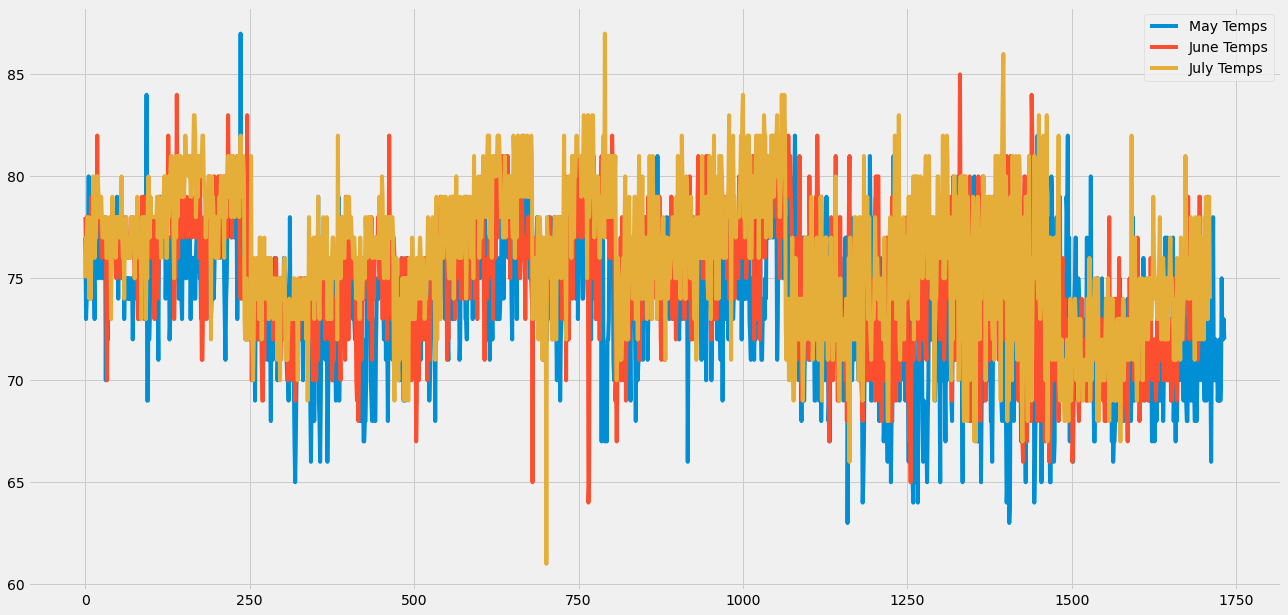

In [34]:
df3.plot(figsize=(20,10))


<AxesSubplot:ylabel='Frequency'>

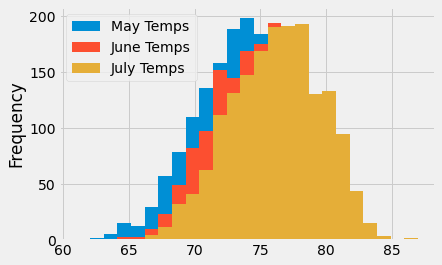

In [50]:
df3.plot.hist(bins=25)

In [61]:
df4 = pd.concat([results_nov_df, results_dec_df, results_jan_df])
df4.describe()

,November Temps,December Temps,January Temps
count,1488.000000,1517.000000,1727.000000
mean,73.252688,71.041529,68.726115
std,3.617282,3.745920,4.367892
min,61.000000,56.000000,54.000000
25%,71.000000,69.000000,66.000000
50%,74.000000,71.000000,69.000000
75%,76.000000,74.000000,72.000000
max,83.000000,83.000000,81.000000


<AxesSubplot:ylabel='Frequency'>

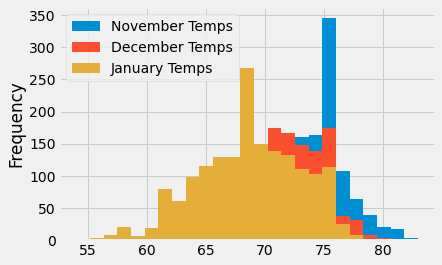

In [62]:
df4.plot.hist(bins=25)